# Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
tt = pd.read_csv('finaltt.csv')

In [3]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108825 entries, 0 to 108824
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     108825 non-null  int64 
 1   date           108825 non-null  object
 2   content        108732 non-null  object
 3   id             108825 non-null  int64 
 4   user_location  108706 non-null  object
 5   username       108825 non-null  object
 6   verified       108825 non-null  int64 
 7   duplicate      108825 non-null  int64 
 8   relevant       108825 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 7.5+ MB


In [4]:
tt.fillna(0)

,Unnamed: 0,date,content,id,user_location,username,verified,duplicate,relevant
0,0,2020-08-30 08:22:38+00:00,happy listening folks stay blessed safe times ...,254791401,"Davis, California, USA",mbvukutaphiri,0,1,1
1,1,2020-08-28 23:20:42+00:00,blaze,606675029,0,ChrispyKremeKim,0,0,0
2,2,2020-08-27 19:37:03+00:00,tbt voice donovantroi serving glamorous fabulo...,331170446,"Antioch, California",DonovanTroi,1,0,0
3,3,2020-08-27 01:00:12+00:00,koihime enbu ryorairai fighting ex layer stree...,1085676697482014720,0,UnderCoverToni,0,1,0
4,4,2020-08-25 19:33:02+00:00,blaze4k aint deleting shit,298651233,"Bay Area, CA",Victorres,0,1,0
...,...,...,...,...,...,...,...,...,...
108820,108820,2020-11-06 01:13:59+00:00,oaklandfireca weeks ago stopped 3 alarm macart...,1324520370146213888,"Oakland, California",MeghanMacaluso,0,1,0
108821,108821,2020-11-05 06:29:25+00:00,welcome satan safe clean water hummingbird egg...,1324237363791290368,"Palo Alto, CA",SatansMlt,0,1,1
108822,108822,2020-11-04 14:54:17+00:00,nthn like trump denied californians federal he...,1324002029874810881,"Hayward, CA",k1sep1,0,1,0
108823,108823,2020-11-03 18:48:04+00:00,good news wildfires,1323698478111846401,California,InsuringCAL,0,1,1


In [5]:
tt.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
tt.dropna(inplace=True)

In [7]:
X = tt['content']
y = tt['relevant']

In [8]:
# split the data into the traininig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [9]:
cvec = CountVectorizer()
# fit a transform the vectorizer
Xc_train = cvec.fit_transform(X_train)   
Xc_test = cvec.transform(X_test)

In [10]:
Xc_train.shape

(76029, 93212)

# Multinominal Naive Bayes

In [11]:
nb = Pipeline([
    ('cvec', CountVectorizer() ),
    ('nb', MultinomialNB()),
])

In [12]:
pipe_params = {
    'cvec__max_features': [1000, 2000, 3000, 4000, 5000],
    'cvec__min_df': [1, 2, 3, 4,5],
    'cvec__max_df': [0.95, 0.9, 1],
    'cvec__ngram_range': [(1,1), (1,2)],
    
                }

In [13]:
# Instantiate GridsearchCV
grid = GridSearchCV(nb,
                   pipe_params,
                   cv = 5)

In [14]:
from sklearn.model_selection import  RandomizedSearchCV

mnb = RandomizedSearchCV(nb,
                   pipe_params,
                    n_iter=200,
                              cv=5,
                              n_jobs=-1,
                              verbose=10,
                              random_state=42)

In [29]:
mnb.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 150 is smaller than n_iter=200. Running 150 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.92929014 0.90787726 0.92921122 0.90778519 0.92926383 0.90787726
 0.92925068 0.90795618 0.92930329 0.90773258 0.93097371 0.90817976
 0.93102632 0.90821922 0.93088164 0.90817976 0.9309474  0.90815345
 0.93101317 0.90816661 0.93065804 0.91002116 0.93073696 0.90953451
 0.93060543 0.90960027 0.93057912 0.90966604 0.9306712  0.90962658
 0.93051335 0.91088926 0.93057911 0.9108235  0.9305002  0.91087611
 0.93052651 0.9108498  0.93047389 0.91086296 0.93097371 0.91267806
 0.93115784 0.91262544 0.93096055 0.91267806 0.93098686 0.91271751
 0.93098686 0.91265175 0.92929014 0.90787726 0.92921122 0.90778519
 0.92926383 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                             ('nb', MultinomialNB())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'cvec__max_df': [0.95, 0.9, 1],
                                        'cvec__max_features': [1000, 2000, 3000,
                                                               4000, 5000],
                                        'cvec__min_df': [1, 2, 3, 4, 5],
                                        'cvec__ngram_range': [(1, 1), (1, 2)]},
                   random_state=42, verbose=10)

In [30]:
mnb.best_params_

{'cvec__ngram_range': (1, 1),
 'cvec__min_df': 2,
 'cvec__max_features': 5000,
 'cvec__max_df': 0.95}

In [18]:
# define function to show scores
def model_evaluation(model):
    best_parameters= model.best_params_
    best_estimator = model.best_estimator_
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    model_preds = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', display_labels = ['relevant', 'irrelevant']) 
    Accuracy = accuracy_score(y_test, model_preds)
    Recall = recall_score(y_test, model_preds)
    Precision = precision_score(y_test, model_preds)
    F1_score = f1_score(y_test, model_preds)
    ROC_AUC_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    # ROC
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0,1], [0,1],label = 'baseline', linestyle = '--')
    plt.legend();
    return f'best parameters: {best_parameters}', f'best estimators: {best_estimator}', f'train score: {train_score}', f'test score: {test_score}', f'model predictions: {model_preds}', f'Accuracy: {Accuracy}', f'Sensitivity: {Recall}', f'Precision: {Precision}', f'F1 score: {F1_score}', f'AUC Score: {ROC_AUC_score}'

("best parameters: {'cvec__ngram_range': (1, 1), 'cvec__min_df': 2, 'cvec__max_features': 5000, 'cvec__max_df': 0.95}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.95, max_features=5000, min_df=2)),\n                ('nb', MultinomialNB())])",
 'train score: 0.9364189980139157',
 'test score: 0.9321446108519519',
 'model predictions: [0 0 0 ... 1 0 0]',
 'Accuracy: 0.9321446108519519',
 'Sensitivity: 0.919094279661017',
 'Precision: 0.8126683058189907',
 'F1 score: 0.8626110731373888',
 'AUC Score: 0.9654725293784971')

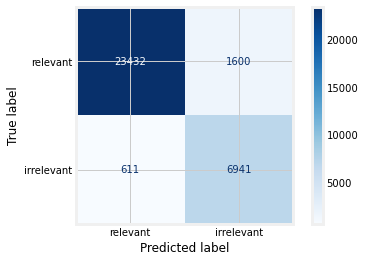

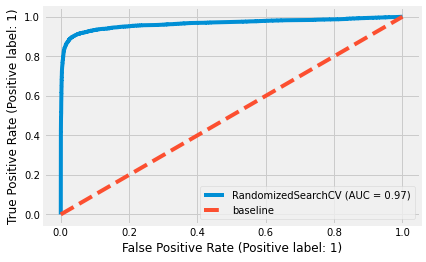

In [33]:
model_evaluation(mnb)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logit = Pipeline([
    ('cvec', CountVectorizer() ),
    ('logit', LogisticRegression(penalty='none',
               C = 1.0,
               solver='lbfgs',
               max_iter=1000,
               verbose=20))
])

In [16]:
logit.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.7min finished


Pipeline(steps=[('cvec', CountVectorizer()),
                ('logit',
                 LogisticRegression(max_iter=1000, penalty='none',
                                    verbose=20))])

train score: 0.9999079298688658
test score: 0.9814019150503315
model predictions: [0 0 0 ... 1 0 0]
Accuracy: 0.9814019150503315
Sensitivity: 0.9385593220338984
Precision: 0.9803596127247579
F1 score: 0.9590041942903531
AUC Score: 0.9741548138298233


NameError: name 'model_preds' is not defined

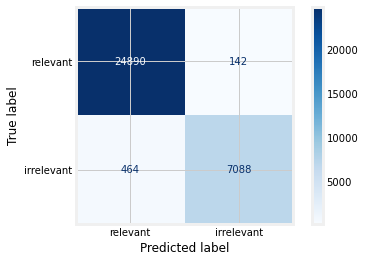

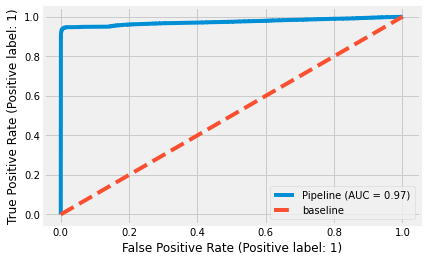

In [23]:
# since logsitic Regression with pipeline has no attribute 'best_params_', 'best_estimators_',
# we buid these calculations
train_score = logit.score(X_train, y_train)
test_score = logit.score(X_test, y_test)
logit_preds = logit.predict(X_test)
plot_confusion_matrix(logit, X_test, y_test, cmap='Blues', display_labels = ['relevant', 'irrelevant']) 
Accuracy = accuracy_score(y_test, logit_preds)
Recall = recall_score(y_test, logit_preds)
Precision = precision_score(y_test, logit_preds)
F1_score = f1_score(y_test, logit_preds)
ROC_AUC_score = roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1])
print(f'train score: {train_score}')
print(f'test score: {test_score}'), 
print(f'model predictions: {logit_preds}')
print(f'Accuracy: {Accuracy}')
print(f'Sensitivity: {Recall}')
print(f'Precision: {Precision}')
print(f'F1 score: {F1_score}')
print(f'AUC Score: {ROC_AUC_score}')

# ROC
plot_roc_curve(logit, X_test, y_test)
plt.plot([0,1], [0,1],label = 'baseline', linestyle = '--')
plt.legend();
f'train score: {train_score}', f'test score: {test_score}', f'model predictions: {model_preds}', f'Accuracy: {Accuracy}', f'Sensitivity: {Recall}', f'Precision: {Precision}', f'F1 score: {F1_score}', f'AUC Score: {ROC_AUC_score}'

In [61]:
from sklearn.preprocessing import StandardScaler

from scipy.stats import uniform, loguniform
pipe = Pipeline([('cvec', CountVectorizer(
    max_df=.325,
    max_features=2000,
    min_df=5,
    ngram_range=(1, 2),
    )),
    ('ss', StandardScaler(with_mean=False)),
    ('lasso', LogisticRegression(penalty='l1',
                                 solver='liblinear'
                                 ))])

params = {
    'lasso__C': loguniform(1.0000001, 20)
}

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
lasso = RandomizedSearchCV(pipe,
                            params,
                              n_iter=200,
                              cv=5,
                              n_jobs=-1,
                              verbose=20,
                              random_state=42)

lasso.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec',
                                              CountVectorizer(max_df=0.325,
                                                              max_features=2000,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('ss',
                                              StandardScaler(with_mean=False)),
                                             ('lasso',
                                              LogisticRegression(penalty='l1',
                                                                 solver='liblinear'))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'lasso__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9b1d59dd00>},
           

("best parameters: {'lasso__C': 1.0210452128459646}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.325, max_features=2000, min_df=5,\n                                 ngram_range=(1, 2))),\n                ('ss', StandardScaler(with_mean=False)),\n                ('lasso',\n                 LogisticRegression(C=1.0210452128459646, penalty='l1',\n                                    solver='liblinear'))])",
 'train score: 0.9746017966828447',
 'test score: 0.9683587036582372',
 'model predictions: [0 0 0 ... 1 0 0]',
 'Accuracy: 0.9683587036582372',
 'Sensitivity: 0.8898305084745762',
 'Precision: 0.9712386182974418',
 'F1 score: 0.9287540598438255',
 'AUC Score: 0.9604812434363675')

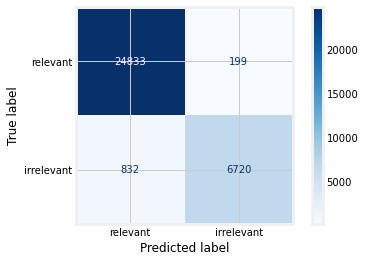

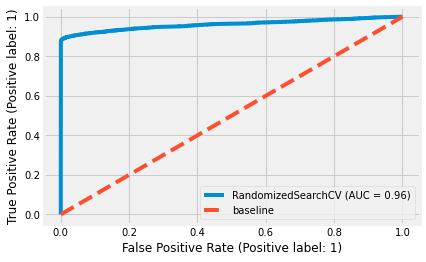

In [63]:
model_evaluation(lasso)

In [64]:
# Ridge
pipe = Pipeline([('cvec', CountVectorizer(
    max_df=.325,
    max_features=2000,
    min_df=5,
    ngram_range=(1, 2),
   )),
    ('ss', StandardScaler(with_mean=False)),
    ('ridge', LogisticRegression(penalty='l2',
                                 solver='liblinear'
                                 ))])

ridge_params = {
    'ridge__C': loguniform(1.0000001, 20)
}

In [65]:
ridge = RandomizedSearchCV(pipe,
                              ridge_params,
                              n_iter=75,
                              cv=5,
                              n_jobs=-1,
                              verbose=True,
                              random_state=42)

ridge.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec',
                                              CountVectorizer(max_df=0.325,
                                                              max_features=2000,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('ss',
                                              StandardScaler(with_mean=False)),
                                             ('ridge',
                                              LogisticRegression(solver='liblinear'))]),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'ridge__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9afcc169d0>},
                   random_state=42, verbose=True)

("best parameters: {'ridge__C': 1.1493000396135882}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.325, max_features=2000, min_df=5,\n                                 ngram_range=(1, 2))),\n                ('ss', StandardScaler(with_mean=False)),\n                ('ridge',\n                 LogisticRegression(C=1.1493000396135882, solver='liblinear'))])",
 'train score: 0.9746938668139788',
 'test score: 0.9681131843849742',
 'model predictions: [0 0 0 ... 1 0 0]',
 'Accuracy: 0.9681131843849742',
 'Sensitivity: 0.8898305084745762',
 'Precision: 0.9701169337375487',
 'F1 score: 0.9282409006146832',
 'AUC Score: 0.9600902264592847')

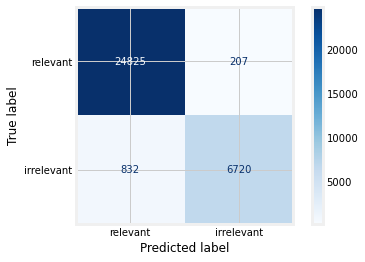

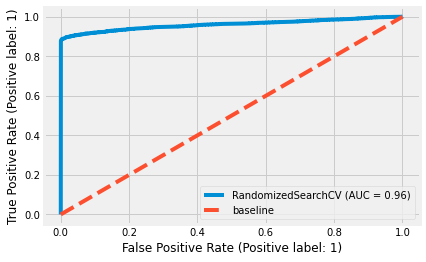

In [66]:
model_evaluation(ridge)

In [71]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([('cvec', CountVectorizer(
    max_df=.325,
    max_features=2000,
    min_df=5,
    ngram_range=(1, 2),
   )),
    ('knn', KNeighborsClassifier())])

knn_params = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

In [72]:
knn =  RandomizedSearchCV(
    pipe,
    knn_params,
    n_iter=75,
    n_jobs=-1,
    cv=5,
    verbose=10,
    random_state=42,
)

knn.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 12 is smaller than n_iter=75. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec',
                                              CountVectorizer(max_df=0.325,
                                                              max_features=2000,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'knn__n_neighbors': [3, 5, 7],
                                        'knn__p': [1, 2],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, verbose=10)

("best parameters: {'knn__weights': 'distance', 'knn__p': 1, 'knn__n_neighbors': 3}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.325, max_features=2000, min_df=5,\n                                 ngram_range=(1, 2))),\n                ('knn',\n                 KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'))])",
 'train score: 0.9964224177616435',
 'test score: 0.9233366069236435',
 'model predictions: [0 0 0 ... 0 0 0]',
 'Accuracy: 0.9233366069236435',
 'Sensitivity: 0.6831302966101694',
 'Precision: 0.9800531914893617',
 'F1 score: 0.805087390761548',
 'AUC Score: 0.8792792339153341')

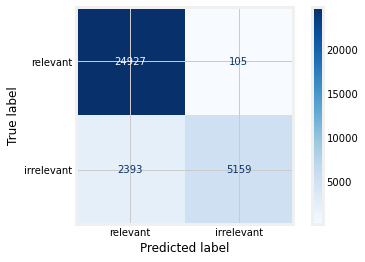

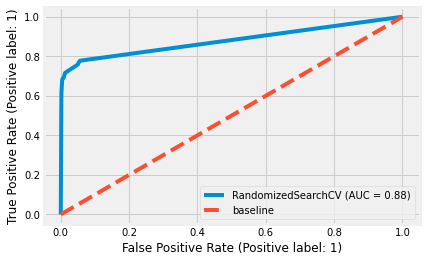

In [73]:
model_evaluation(knn)

In [ ]:
# Randomforest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  RandomizedSearchCV
pipe = Pipeline([('cvec', CountVectorizer(
    max_df=.325,
    max_features=2000,
    min_df=5,
    ngram_range=(1, 2),
   )),
     ('rf', RandomForestClassifier(random_state = 42))])

rf_params = {
             'rf__n_estimators': [200,300,500],
          'rf__max_depth': [20,30,50],
          'rf__min_samples_split': [20,30,40,60],
          'rf__min_samples_leaf': [2,4,10,20],
          'rf__max_features': ['auto', 'sqrt']
              }

rf = RandomizedSearchCV(estimator=pipe, 
                        param_distributions = rf_params,
                        random_state=42,
                        cv=5,
                       verbose=10)

In [20]:
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=200
[CV 1/5; 1/10] END rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=200; total time=   8.0s
[CV 2/5; 1/10] START rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=200
[CV 2/5; 1/10] END rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=200; total time=   7.4s
[CV 3/5; 1/10] START rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=200
[CV 3/5; 1/10] END rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=200; total time=   7.6s
[CV 4/5; 1/10] START rf__max_depth=20, rf__max_features=auto, rf__min_samples_lea

[CV 5/5; 6/10] END rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=2, rf__min_samples_split=60, rf__n_estimators=200; total time=   9.7s
[CV 1/5; 7/10] START rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=300
[CV 1/5; 7/10] END rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=300; total time=  10.3s
[CV 2/5; 7/10] START rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=300
[CV 2/5; 7/10] END rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=300; total time=  12.7s
[CV 3/5; 7/10] START rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=300
[CV 3/5; 7/10] END rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=20, rf__min_samples_split=60, rf__n_estimators=300; total time

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec',
                                              CountVectorizer(max_df=0.325,
                                                              max_features=2000,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'rf__max_depth': [20, 30, 50],
                                        'rf__max_features': ['auto', 'sqrt'],
                                        'rf__min_samples_leaf': [2, 4, 10, 20],
                                        'rf__min_samples_split': [20, 30, 40,
                                                                  60],
             

("best parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 30, 'rf__min_samples_leaf': 2, 'rf__max_features': 'auto', 'rf__max_depth': 50}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.325, max_features=2000, min_df=5,\n                                 ngram_range=(1, 2))),\n                ('rf',\n                 RandomForestClassifier(max_depth=50, min_samples_leaf=2,\n                                        min_samples_split=30, n_estimators=200,\n                                        random_state=42))])",
 'train score: 0.9647634455273646',
 'test score: 0.9635710778296096',
 'model predictions: [0 0 0 ... 1 0 0]',
 'Accuracy: 0.9635710778296096',
 'Sensitivity: 0.845603813559322',
 'Precision: 0.9967223349461527',
 'F1 score: 0.9149652553907873',
 'AUC Score: 0.9632833717544933')

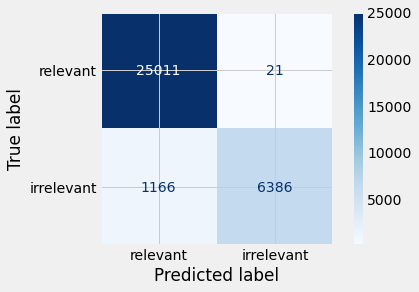

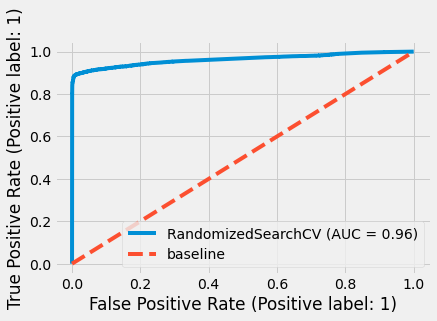

In [38]:
model_evaluation(rf)

In [14]:
# (THREAD) Instantiate and fit a gridsearch model for this SVC!
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter = 2000)
pgrid = {"C": np.linspace(0.0001, 1, 20)}
gcv = GridSearchCV(svc,
                  pgrid,
                  cv=5,
                  n_jobs =-1,
                  verbose=10)

In [15]:
gcv.fit(Xc_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=2000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 5.27263158e-02, 1.05352632e-01, 1.57978947e-01,
       2.10605263e-01, 2.63231579e-01, 3.15857895e-01, 3.68484211e-01,
       4.21110526e-01, 4.73736842e-01, 5.26363158e-01, 5.78989474e-01,
       6.31615789e-01, 6.84242105e-01, 7.36868421e-01, 7.89494737e-01,
       8.42121053e-01, 8.94747368e-01, 9.47373684e-01, 1.00000000e+00])},
             verbose=10)

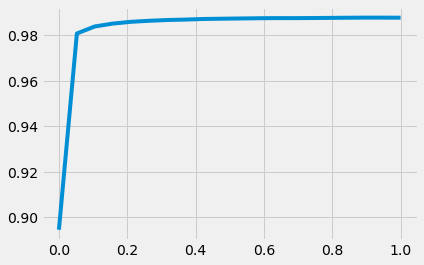

In [95]:
plt.style.use('fivethirtyeight')
# Remove Semicolon for output of results
gcv.cv_results_;

# Save cv results as a DataFrame
gcv_df = pd.DataFrame(gcv.cv_results_)

# Visualize how different values of C affect accuracy
plt.plot("param_C", "mean_test_score", data = gcv_df)

In [16]:
# Generate predictions.
y_preds = gcv.predict(Xc_test)

In [17]:
%%time
print('train:' ,gcv.score(Xc_train, y_train))
print('test:' ,gcv.score(Xc_test, y_test))

train: 0.999789553985979
test: 0.9883992143383256
CPU times: user 19.1 ms, sys: 7.7 ms, total: 26.8 ms
Wall time: 24.5 ms


In [18]:
print('accuracy:' ,accuracy_score(y_test, y_preds))

accuracy: 0.9883992143383256


In [19]:
print('sensitivity:', recall_score(y_test, y_preds))
print('precision:', precision_score(y_test, y_preds))

sensitivity: 0.9535222457627118
precision: 0.9962645268400664


In [37]:
# try to randomiezsearch svc parameters, did not get through!!
# pipe = Pipeline([('cvec', CountVectorizer(
#     max_df=.325,
#     max_features=2000,
#     min_df=5,
#     ngram_range=(1, 2),
#     )),
#     ('ss', StandardScaler(with_mean=False)),
#     ('svc', svm.SVC())])

# svc_params = {
#     'svc__C': np.logspace(0.0001, 1, 20),
#     'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'svc__gamma': ['scale', 'auto']

# }

# svc = RandomizedSearchCV(estimator = pipe,
#                      param_distributions = svc_params,
#                      scoring = 'accuracy',
#                      n_iter = 2,
#                      n_jobs = -1,
#                      cv = 5,
#                      verbose = 10)

In [ ]:
# svc.fit(X_train, y_train)

In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,
                            min_samples_split =7,
                            min_samples_leaf = 3,
                            ccp_alpha=0.01,
                            random_state = 42)

In [21]:
# fit the model
dt.fit(Xc_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10, min_samples_leaf=3,
                       min_samples_split=7, random_state=42)

In [22]:
y_preds = dt.predict(Xc_test)

In [23]:
# Evaluate model.
print(f'Score on training set: {dt.score(Xc_train, y_train)}')
print(f'Score on testing set: {dt.score(Xc_test, y_test)}')
print('accuracy:' ,accuracy_score(y_test, y_preds))
print('sensitivity:', recall_score(y_test, y_preds))
print('precision:', precision_score(y_test, y_preds))

Score on training set: 0.9222533506951295
Score on testing set: 0.9240424748342745
accuracy: 0.9240424748342745
sensitivity: 0.6725370762711864
precision: 0.9996063766975005


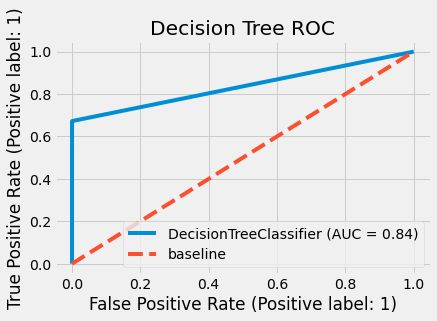

In [41]:
    ROC_AUC_score = roc_auc_score(y_test, dt.predict_proba(Xc_test)[:, 1])
    # ROC
    plt.style.use('fivethirtyeight')
    plot_roc_curve(dt, Xc_test, y_test)
    plt.plot([0,1], [0,1],label = 'baseline', linestyle = '--')
    plt.title('Decision Tree ROC')
    plt.legend();

In [ ]:
from sklearn import svm
svc = svm.SVC(probability=True)
svc.fit(Xc_train, y_train)
# pgrid = {"C": np.linspace(0.0001, 1, 20)}
# svc = GridSearchCV(svc,
#                   pgrid,
#                   cv=5,
#                   n_jobs =-1,
#                   verbose=10)
# svc.fit(Xc_train, y_train)

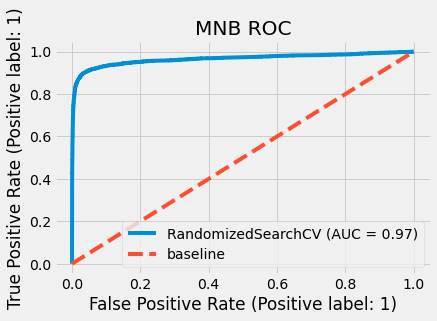

In [53]:
    ROC_AUC_score = roc_auc_score(y_test, mnb.predict_proba(X_test)[:, 1])
    # ROC
    plot_roc_curve(mnb, X_test, y_test)
    plt.plot([0,1], [0,1],label = 'baseline', linestyle = '--')
    plt.title('MNB ROC')
    plt.legend();

In [39]:
# prediction
tt.head()

,date,content,id,user_location,username,verified,duplicate,relevant
0,2020-08-30 08:22:38+00:00,happy listening folks stay blessed safe times ...,254791401,"Davis, California, USA",mbvukutaphiri,0,1,1
1,2020-08-28 23:20:42+00:00,blaze,606675029,0,ChrispyKremeKim,0,0,0
2,2020-08-27 19:37:03+00:00,tbt voice donovantroi serving glamorous fabulo...,331170446,"Antioch, California",DonovanTroi,1,0,0
3,2020-08-27 01:00:12+00:00,koihime enbu ryorairai fighting ex layer stree...,1085676697482014720,0,UnderCoverToni,0,1,0
4,2020-08-25 19:33:02+00:00,blaze4k aint deleting shit,298651233,"Bay Area, CA",Victorres,0,1,0


In [57]:
# time series
# first create data frame
pred = rf.predict(X)
proba = p = rf.predict_proba(X)[:,1]

In [58]:
f = pd.DataFrame(zip(pred, proba), columns = ['pred', 'proba'])

In [59]:
f.shape

(108613, 2)

In [60]:
tt.shape

(108613, 8)

In [61]:
tt.columns

Index(['date', 'content', 'id', 'user_location', 'username', 'verified',
       'duplicate', 'relevant'],
      dtype='object')

In [82]:
t = pd.concat([tt, f], axis=1)

In [83]:
fire = t[['date', 'content', 'pred', 'proba']]

In [52]:
t.to_csv('timeseries.csv')